# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Answer:** This task is primarily a regression task. We are looking to see what factors lead to increased or decreased price in used cars. Since the price is a numeric feature, predicting whether it falls into a category such as "expensive" or "inexpensive" would be arbitrary, whereas predicting the potential price of the car is likely how we should approach this problem. If we can determine what factors influence price increases and decreases, we can make predictions based on other variables to predict the price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Step 1: Univariate Analysis Part 1 (Eyeball test):** We visualize the data from a univariate persepective, and then see if anything stands out to the naked eye.

**Step 2: Univariate Analysis Part 2(Advanced):** Univariate analysis from a more statistical perspective.

**Step 3: Preliminary Multivariate Analysis:** Pair plot and any other multivariate analysis that can be done immediately

**Step 4: Correlation:** Correlation matrix



### Step 0: Imports and Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.special import exp10
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

C:\Users\black\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\black\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\black\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
vehicles = pd.read_csv("data//vehicles.csv")

### Step 1 Univariate Analysis Part 1

In [3]:
# Just take a look at a few rows and columns

In [4]:
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [5]:
#Look at basic info of dataframe
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Step 2 Univariate Analysis Part 2

In [6]:
#See the following file for report on advanced univariate analysis
from pandas_profiling import ProfileReport
#profile = ProfileReport(vehicles, title="Pandas Profiling Report") - dont run every time
# profile.to_file("Pandas_profiling_report.html")

C:\Users\black\anaconda3\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\black\anaconda3\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\black\AppData\Local\Temp\ipykernel_10120\3220295866.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1

In [7]:
#Based solely on this report, we can probably say the data is very messy, 
#I would say we will likely have to rerun univariate analysis again after we clean the data

### Step 3 Multivariate Analysis

In [8]:
#Way too many data points total, so we will take a sample
# sns.pairplot(vehicles.sample(10000)) - only run once


In [9]:
#We will probably have to rerun this multivariate analysis again as well after data preparation

### Step 4 Correlation Matrix

C:\Users\black\AppData\Local\Temp\ipykernel_10120\2587175474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vehicles.corr())


<Axes: >

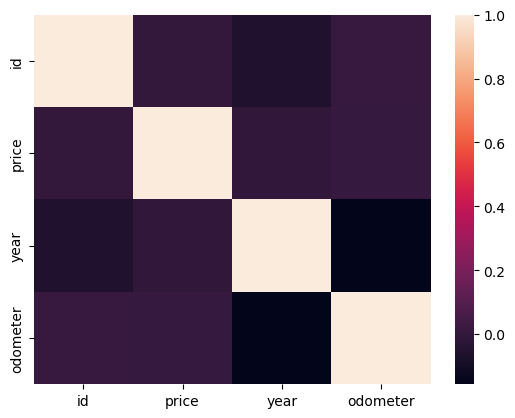

In [10]:
#we will rerun this as well after preparing the data
sns.heatmap(vehicles.corr())

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 


### Steps
1. Data Cleaning
    1. Remove unnecessary columns
    2. Removing NaNs
    3. Removing Bad Data
2. Rerun data understanding to see if any new data understanding arises.

### Data Cleaning

In [11]:
#first drop the ID column because it's non descriptive (100% of ID is distinct, appears to be sales ID or just straight up row number)

In [12]:
vehicles_clean = vehicles.drop("id", axis=1)

In [13]:
#Then remove nans, then see how much that leaves us with
vehicles_clean = vehicles_clean.dropna()
vehicles_clean.info()
#Compared to the original there is not much left, but it will still be a good sample size.
#We can revisit this later if it seems like we dropped too much info for the model to be useful, but for now let's continue
#For example, size had a lot of missing rows, 
#but we still want to include it because it seems like it should have impact on price

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34868 entries, 126 to 426836
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        34868 non-null  object 
 1   price         34868 non-null  int64  
 2   year          34868 non-null  float64
 3   manufacturer  34868 non-null  object 
 4   model         34868 non-null  object 
 5   condition     34868 non-null  object 
 6   cylinders     34868 non-null  object 
 7   fuel          34868 non-null  object 
 8   odometer      34868 non-null  float64
 9   title_status  34868 non-null  object 
 10  transmission  34868 non-null  object 
 11  VIN           34868 non-null  object 
 12  drive         34868 non-null  object 
 13  size          34868 non-null  object 
 14  type          34868 non-null  object 
 15  paint_color   34868 non-null  object 
 16  state         34868 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 4.8+ MB


In [14]:
#Next we need to take a look at all of the unique values from our initial pandas profiling report

In [15]:
#First, we can see that region is very specific. While I think it would be possible to utilise this info,
#For now we should see if we can get the model to work well without it, and revisit if necessary.
vehicles_clean = vehicles_clean.drop("region", axis=1)

In [16]:
#The price column has many issues with it, there are a significant number of prices that need to be removed due to being 0
print(np.sort(vehicles_clean['price'].unique()))
vehicles_clean = vehicles_clean.drop(vehicles_clean[vehicles_clean['price'] == 0].index)
print(np.sort(vehicles_clean['price'].unique()))
#very low prices don't make sense either, there is no way to tell the difference between a sale and a gift at that point
#let's see how it looks after any price under 100 is removed
vehicles_clean = vehicles_clean.drop(vehicles_clean[vehicles_clean['price'] < 100].index)
print(np.sort(vehicles_clean['price'].unique()))
#Recheck to make sure we didn't remove too much
vehicles_clean.info()
#looks fine

[     0      1      3 ... 144832 150000 155000]
[     1      3      6 ... 144832 150000 155000]
[   116    123    166 ... 144832 150000 155000]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31778 entries, 215 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         31778 non-null  int64  
 1   year          31778 non-null  float64
 2   manufacturer  31778 non-null  object 
 3   model         31778 non-null  object 
 4   condition     31778 non-null  object 
 5   cylinders     31778 non-null  object 
 6   fuel          31778 non-null  object 
 7   odometer      31778 non-null  float64
 8   title_status  31778 non-null  object 
 9   transmission  31778 non-null  object 
 10  VIN           31778 non-null  object 
 11  drive         31778 non-null  object 
 12  size          31778 non-null  object 
 13  type          31778 non-null  object 
 14  paint_color   31778 non-null  object 
 15  state   

In [17]:
#make sure there is nothing weird about these columns
print(vehicles_clean['manufacturer'].unique()) #looks good
print(vehicles_clean['model'].unique()) #very hard for me to tell if there's anything wrong with this column without domain expertise
print(vehicles_clean['condition'].unique()) #looks good
print(vehicles_clean['cylinders'].unique()) #looks good, although other is not very descriptive
print(vehicles_clean['fuel'].unique()) #looks good, although other is not very descriptive
print(np.sort(vehicles_clean['odometer'].unique())) #looks good
print(vehicles_clean['title_status'].unique()) #looks good
print(vehicles_clean['transmission'].unique())#looks good
print(vehicles_clean['drive'].unique()) #looks good
print(vehicles_clean['size'].unique()) #looks good
print(vehicles_clean['type'].unique()) #looks good
print(vehicles_clean['paint_color'].unique()) #looks good
print(vehicles_clean['state'].unique()) #looks good

['toyota' 'bmw' 'mazda' 'ford' 'mercedes-benz' 'ferrari' 'lexus'
 'chevrolet' 'audi' 'mitsubishi' 'infiniti' 'nissan' 'volkswagen' 'honda'
 'ram' 'hyundai' 'fiat' 'cadillac' 'jeep' 'gmc' 'jaguar' 'volvo' 'dodge'
 'kia' 'chrysler' 'subaru' 'acura' 'mini' 'buick' 'rover' 'lincoln'
 'porsche' 'saturn' 'harley-davidson' 'pontiac' 'mercury' 'tesla'
 'alfa-romeo' 'datsun' 'land rover' 'aston-martin']
['echo' '525i' 'miata mx-5' ... 'f150, xlt' 'f150, platinum' 'cruze, 2lt']
['excellent' 'fair' 'good' 'like new' 'new' 'salvage']
['4 cylinders' '6 cylinders' '8 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
['gas' 'hybrid' 'diesel' 'other' 'electric']
[0.000000e+00 1.000000e+00 5.000000e+00 ... 2.319010e+06 3.000000e+06
 9.999999e+06]
['clean' 'rebuilt' 'salvage' 'lien' 'missing' 'parts only']
['automatic' 'manual' 'other']
['fwd' 'rwd' '4wd']
['compact' 'mid-size' 'full-size' 'sub-compact']
['sedan' 'convertible' 'truck' 'coupe' 'SUV' 'hatchback' 'wagon' 'picku

In [18]:
##### finally let's remove VIN. It should have no discernable impact on model, and certainly not any impact 
##### that wouldn't be a result of coolinearity
vehicles_clean = vehicles_clean.drop("VIN", axis=1)

### Revisions after modelling

In [19]:
#Later decided that It was worth adding in the number of cylinders, first requiring us to remove cylinders with "other"
vehicles_clean = vehicles_clean.drop(vehicles_clean[vehicles_clean['cylinders'] == 'other'].index)
vehicles_clean['cylinders'] = vehicles_clean['cylinders'].apply(lambda x: x.replace(" cylinders", ""))
vehicles_clean['cylinders'] = pd.to_numeric(vehicles_clean['cylinders'])

In [20]:
#we need to drop model from the data. we may know that from real life experience model has a heavy effect on price, but
#ultimately, there are too many different individual models for our model to seem to get a grasp on them all
vehicles_clean = vehicles_clean.drop("model", axis=1)

In [21]:
#After running and validatin models, we discovered we may need to normalize price 

#need to save these for later to undo normalization later
minimum_norm = vehicles_clean['price'].min()
maximum_norm = vehicles_clean['price'].max()
vehicles_clean['price'] = (vehicles_clean['price'] - vehicles_clean['price'].min()) / (vehicles_clean['price'].max() - vehicles_clean['price'].min())

In [22]:
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 215 to 426833
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         31686 non-null  float64
 1   year          31686 non-null  float64
 2   manufacturer  31686 non-null  object 
 3   condition     31686 non-null  object 
 4   cylinders     31686 non-null  int64  
 5   fuel          31686 non-null  object 
 6   odometer      31686 non-null  float64
 7   title_status  31686 non-null  object 
 8   transmission  31686 non-null  object 
 9   drive         31686 non-null  object 
 10  size          31686 non-null  object 
 11  type          31686 non-null  object 
 12  paint_color   31686 non-null  object 
 13  state         31686 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 3.6+ MB


In [23]:
#Let's redo univariate analysis and correlation at this point

In [24]:
#See the following file for report on advanced univariate analysis
# profile = ProfileReport(vehicles_clean, title="Data Clean") #- dont run every time just once
# profile.to_file("Pandas_profiling_report_clean.html")

C:\Users\black\AppData\Local\Temp\ipykernel_10120\3159532807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(vehicles_clean.corr())


<Axes: >

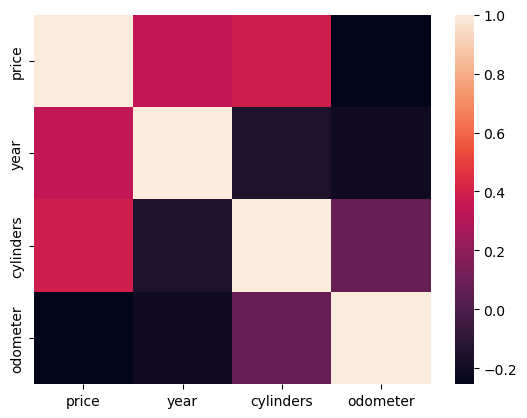

In [25]:
sns.heatmap(vehicles_clean.corr())

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Pipeline steps**
1. Train Test split
2. Pipeline
    1. Scaling numeric features
    2. Converting categorical features

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SequentialFeatureSelector
from scipy.special import exp10
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.express as px
import pandas as pd
import warnings

In [27]:
X = vehicles_clean.drop("price", axis=1)
y = vehicles_clean['price']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31686 entries, 215 to 426833
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          31686 non-null  float64
 1   manufacturer  31686 non-null  object 
 2   condition     31686 non-null  object 
 3   cylinders     31686 non-null  int64  
 4   fuel          31686 non-null  object 
 5   odometer      31686 non-null  float64
 6   title_status  31686 non-null  object 
 7   transmission  31686 non-null  object 
 8   drive         31686 non-null  object 
 9   size          31686 non-null  object 
 10  type          31686 non-null  object 
 11  paint_color   31686 non-null  object 
 12  state         31686 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.4+ MB


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=.1)

### Model 1 - Simple Linear Model

In [30]:
categorical_columns = X.select_dtypes(include=["object"]).drop("condition", axis=1).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns

preprocessor = make_column_transformer(
(OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
(OneHotEncoder(drop = 'if_binary'), categorical_columns),
(StandardScaler(), numerical_columns),
verbose_feature_names_out=False
)

In [31]:
model_1 = Pipeline([
('preprocessor', preprocessor),
('regressor', LinearRegression())
])

In [32]:
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['year', 'cylinders', 'odometer'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('regressor', LinearRegression())])

### Model 2 - Basic Ridge Model

In [33]:
categorical_columns = X.select_dtypes(include=["object"]).drop("condition", axis=1).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns

preprocessor = make_column_transformer(
(OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
(OneHotEncoder(drop = 'if_binary'), categorical_columns),
(StandardScaler(), numerical_columns),
verbose_feature_names_out=False
)

In [34]:
model_2 = Pipeline([
('preprocessor', preprocessor),
('regressor', Ridge(solver='lsqr'))
])

In [35]:
param_dict = {'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_1 = GridSearchCV(model_2, param_grid=param_dict)
grid_1.fit(X_train, y_train)

C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "C:\Users\black\

C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "C:\Users\black\

C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "C:\Users\black\

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new']]),
                                                                         ['condition']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         Index(['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['year', 'cylinders', 'odometer'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('regressor', Ridge(solver='lsqr'))]),
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0]})

### Model 3: Basic Lasso Model

In [36]:
categorical_columns = X.select_dtypes(include=["object"]).drop("condition", axis=1).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns

preprocessor = make_column_transformer(
(OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
(OneHotEncoder(drop = 'if_binary'), categorical_columns),
(StandardScaler(), numerical_columns),
verbose_feature_names_out=False
)

In [37]:
model_3 = Pipeline([
('preprocessor', preprocessor),
('regressor', Lasso())
])

In [38]:
model_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['salvage',
                                                                              'fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new',
                                                                              'new']]),
                                                  ['condition']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  Index(['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['year', 'cylinders', 'odometer'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('regressor', Lasso())])

# polynomial model

In [39]:
# we are creating this model after already seeing the results of the first few, we are trying to improve upon the result

In [40]:
categorical_columns = X.select_dtypes(include=["object"]).drop("condition", axis=1).columns
numerical_columns = X.select_dtypes(include=[np.number]).columns

preprocessor = make_column_transformer(
(OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']]), ['condition']),
(OneHotEncoder(drop = 'if_binary'), categorical_columns),
(StandardScaler(), numerical_columns),
verbose_feature_names_out=False
)

In [41]:
model_4 = Pipeline([
('preprocessor', preprocessor),
 ("pfeatures", PolynomialFeatures()),
('regressor', LinearRegression())
])

In [42]:
param_dict = {'pfeatures__degree': [1,2,3]}
grid_2 = GridSearchCV(model_4, param_grid=param_dict)
grid_2.fit(X_train, y_train)

C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\black\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "C:\Users\black\

C:\Users\black\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['salvage',
                                                                                                     'fair',
                                                                                                     'good',
                                                                                                     'excellent',
                                                                                                     'like '
                                                                                                     'new',
                                                                                                     'new']]),
                                                                         ['condition']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         Index(['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         Index(['year', 'cylinders', 'odometer'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('pfeatures', PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             param_grid={'pfeatures__degree': [1, 2, 3]})

### Numeric Only Polynomial Model

In [43]:
X_numeric = X.select_dtypes(exclude=["object"])
X_train_numeric = X_train.select_dtypes(exclude=["object"])
X_test_numeric = X_test.select_dtypes(exclude=["object"])

In [44]:
model_5 = Pipeline([("scaler", StandardScaler()),
 ("pfeatures", PolynomialFeatures()),
('regressor', LinearRegression())
])

In [45]:
param_dict = {'pfeatures__degree': [1,2,3, 4, 5]}
grid_3 = GridSearchCV(model_5, param_grid=param_dict)
grid_3.fit(X_train_numeric, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pfeatures', PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             param_grid={'pfeatures__degree': [1, 2, 3, 4, 5]})

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [46]:
#We shall start with plots of all the models predicted vs actual in the dev set, and the MSEs

In [47]:
print(mean_squared_error(model_1.predict(X_train) * (maximum_norm - minimum_norm) + minimum_norm, y_train * (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(grid_1.best_estimator_.predict(X_train)* (maximum_norm - minimum_norm) + minimum_norm, y_train* (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(model_3.predict(X_train)* (maximum_norm - minimum_norm) + minimum_norm, y_train* (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(grid_2.best_estimator_.predict(X_train)* (maximum_norm - minimum_norm) + minimum_norm, y_train* (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(grid_3.best_estimator_.predict(X_train_numeric)* (maximum_norm - minimum_norm) + minimum_norm, y_train* (maximum_norm - minimum_norm) + minimum_norm))

70012647.39519474
70036605.76824635
172124528.53260213
70012647.43135203
107854472.64804089


In [48]:
print(mean_squared_error(model_1.predict(X_test) * (maximum_norm - minimum_norm) + minimum_norm, y_test * (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(grid_1.best_estimator_.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(model_3.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(grid_2.best_estimator_.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))
print(mean_squared_error(grid_3.best_estimator_.predict(X_test_numeric)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))

99144829.24479635
99168079.77917492
168508934.24597317
99144312.84411222
136804848.3935512


In [49]:
pred1 = model_1.predict(X_test)
pred2 = grid_1.best_estimator_.predict(X_test)
pred3 = model_3.predict(X_test)

In [50]:
#theres some weird artifact where one data point is -2 for some reason, let's just remove it
pred1[pred1<0] = 0
pred2[pred2<0] = 0
pred3[pred3<0] = 0

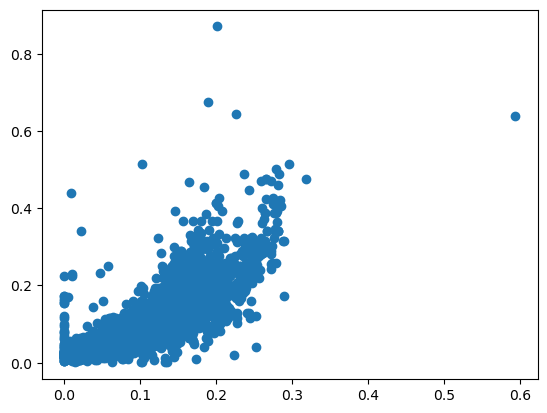

In [51]:
#our model is predicting numbers that are way, way too high, we're going to redo and try to see what happens if we normalize price
plt.scatter(pred1, y_test.to_numpy())

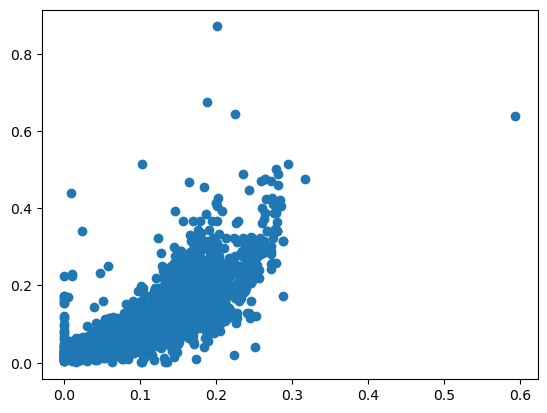

In [52]:

plt.scatter(pred2, y_test.to_numpy())

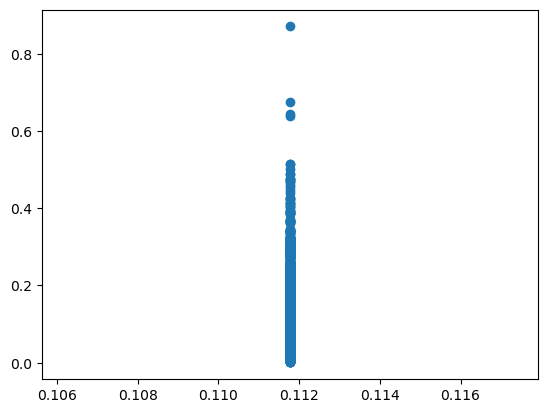

In [53]:
#this is not working well with this model for some reason, we definitely will not use these results, I think its selecting only 1 feature and 1 coefficient or something
plt.scatter(pred3, y_test.to_numpy())

#### Evaluation

Our model is quite a bit off, however, this is only using the metric, MSE. It is very possible that the reason the MSE is bad, is because the MAXIMUM amount the model is off by, is quite bad, but the thing is, we honestly care a lot more about whether this model is good or not, in the case of cars of average price, not really high priced cars like luxury cars. For example, if the error is 10,0000 for a 20,000 dollar car, that is bad, but if its 10,000 for a 75,000 dollar car, that is pretty decent.
Let's take the median absolute error to see if its any better to mitigate this effect:

In [54]:
from sklearn.metrics import median_absolute_error

In [55]:
print(median_absolute_error(model_1.predict(X_test) * (maximum_norm - minimum_norm) + minimum_norm, y_test * (maximum_norm - minimum_norm) + minimum_norm))
print(median_absolute_error(grid_1.best_estimator_.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))
print(median_absolute_error(model_3.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))
print(median_absolute_error(grid_2.best_estimator_.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))
print(median_absolute_error(grid_3.best_estimator_.predict(X_test_numeric)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm))

3682.7226252637956
3674.5249148954435
8777.224462601254
3682.822850550314
4862.395410557247


In [56]:
#This metric is much, much, better for our use case, and as we can see,
#model 2 is doing a pretty darn good job here, so we will go with that model

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Basic Aspects of Used Cars

Before we enter any detailed analysis from our model. Let's go over some things about used cars that many auto dealers probably already know, but are important to reiterate:

#### 1. Price Distribution

Price of used cars is a highly right-skewed distribution with a mean of around 17000 due and median of around 14000 due to the skew. 

In [82]:
adjusted_y = y * (maximum_norm - minimum_norm) + minimum_norm
print("Mean is: " + str(adjusted_y.mean()))
print("Median is: "  + str(adjusted_y.median()))

Mean is: 17375.63475983084
Median is: 13899.0


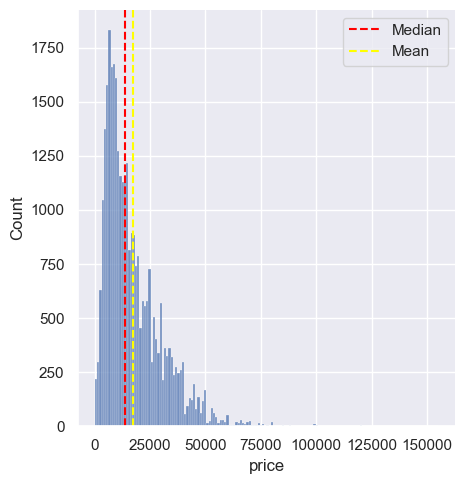

In [77]:
sns.set(rc={'figure.figsize':(11.7,11.27)})
sns.displot(adjusted_y)
plt.axvline(adjusted_y.median(), color='red', label='Median', linestyle='--')
plt.axvline(adjusted_y.mean(), color='yellow', label='Mean', linestyle='--')
plt.legend()

#### 2. Price Distribution Over Time

Used cars mostly depreciate in value, so for the most part, it will be better to have newer cars. As we can see from the below graph, older cars tend to "cling" to the bottom of the price distribution, with quite a few exceptions. The exceptions are for "classic" cars which are some of the only cars that do not depreciate massively in value. As a general rule, our model will not be good at predicting these because our data is too limited for that. We would need either expert appraisal, or data about the movement of markets for certain cars over time in order to have a more accurate model for classic cars. Therefore, our model, which already recommends stocking newer cars where possible, will be more accurate for newer cars as well.

Text(0, 0.5, 'Price')

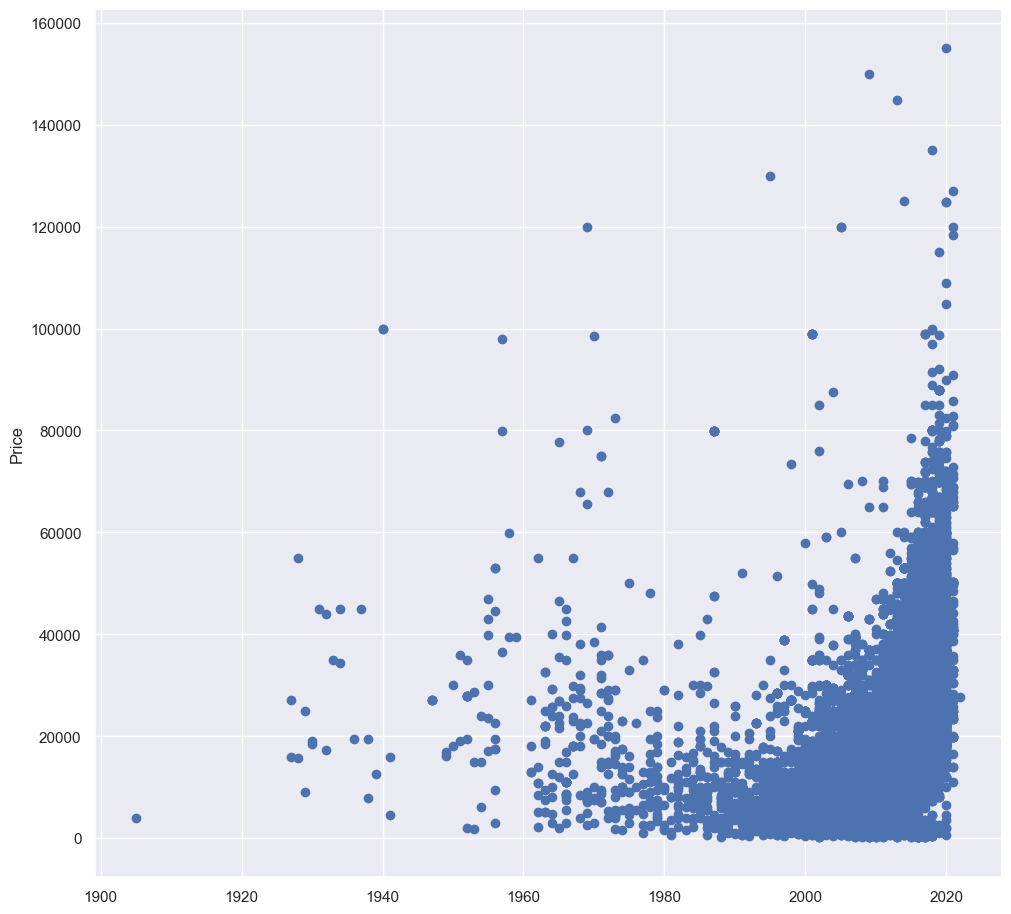

In [89]:
plt.scatter(y = adjusted_y, x = vehicles_clean['year'])
plt.ylabel('Price')

#### Model Results

Here, we will show the results of our best performing model, and the findings that result from that

#### 1. How well does the model perform

In [91]:
print("Median Absolute Error is: {0}".format(median_absolute_error(grid_1.best_estimator_.predict(X_test)* (maximum_norm - minimum_norm) + minimum_norm, y_test* (maximum_norm - minimum_norm) + minimum_norm)))

Median Absolute Error is: 3674.5249148954435


Overall, we can expect the model to be of by about 3500, being more accurate the lower the price is, and less accurate the higher the price is 

#### 2. Model Conclusions

In [132]:
feature_importances = list(zip(grid_1.best_estimator_['regressor'].coef_, grid_1.best_estimator_['preprocessor'].get_feature_names_out()))
feature_importances = sorted(
    feature_importances, 
    key=lambda x: x[0], reverse = True)
print("Top Five Features: {0}".format([X[1] for X in feature_importances[:5]]))
worst = feature_importances[-5:]
worst.reverse()
print("Bottom Five Features: {0}".format([X[1] for X in worst]))

Top Five Features: ['manufacturer_ferrari', 'manufacturer_aston-martin', 'manufacturer_tesla', 'manufacturer_datsun', 'manufacturer_porsche']
Bottom Five Features: ['manufacturer_harley-davidson', 'manufacturer_fiat', 'manufacturer_land rover', 'fuel_other', 'manufacturer_saturn']


As we can see, manufacturer seems to be the most important thing for determining the price of a car. A lot of the most positively correlated, and most negatively correlated aspects that the model is looking at to make its prediction are from manufacturers. Let's explore a little bit more on the positive side so we can give some more solid recommendations for good used cars to sell.

In [133]:
print("Top Ten Features: {0}".format([X[1] for X in feature_importances[:10]]))

Top Ten Features: ['manufacturer_ferrari', 'manufacturer_aston-martin', 'manufacturer_tesla', 'manufacturer_datsun', 'manufacturer_porsche', 'fuel_diesel', 'fuel_electric', 'state_ak', 'paint_color_orange', 'year']


From this info, we can see that there is a clear top 5 brands, let's look at just those brands

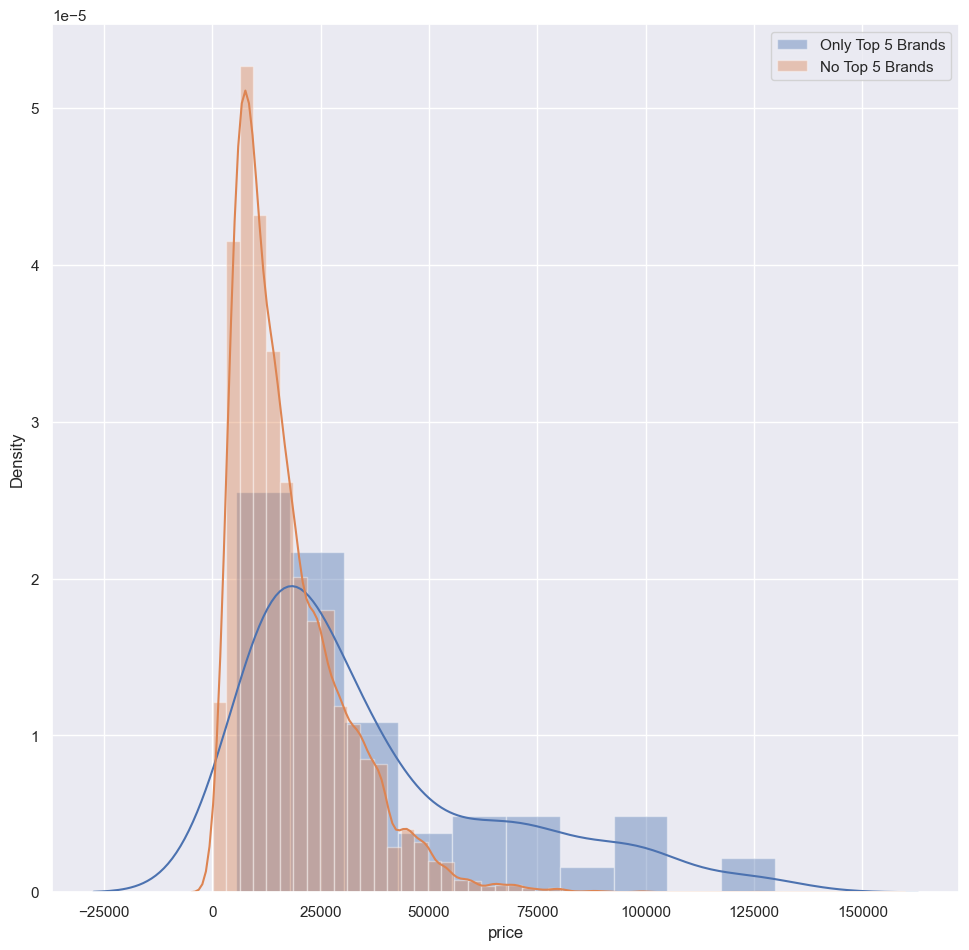

In [148]:
import warnings
warnings.filterwarnings("ignore")
vehicles_clean_only_top_5 = vehicles_clean[vehicles_clean['manufacturer']
                                               .isin(['ferrari', 'aston-martin', 'tesla', 'datsun', 'porsche'])]
vehicles_clean_no_top_5 = vehicles_clean[np.logical_not(vehicles_clean['manufacturer']
                                               .isin(['ferrari', 'aston-martin', 'tesla', 'datsun', 'porsche']))]
sns.distplot(vehicles_clean_only_top_5['price']* (maximum_norm - minimum_norm) + minimum_norm, label='Only Top 5 Brands')
sns.distplot(vehicles_clean_no_top_5['price'] * (maximum_norm - minimum_norm) + minimum_norm, label='No Top 5 Brands')
plt.legend()

#### As expected, the top 5 brands have much more value on average than almost anything else

## Final Notable Findings and Conclusions

1. **Timing:** Used cars mostly depreciate in value over time, and the year of the car is very important
2. **Brands** There is a top 5 "holy grail" brands for used cars which are significantly higher price and includes cars from: Ferrari, Aston-martin, Tesla, Datsun, and Porsche, in that order  
3. **Fuel Type:** Fuel type matters a lot in used cars with diesel and electric having the highest selling point on average, and alternative fuels being the lowest  
4. **Location:** Alaska is the best state for selling used cars at high prices by a significant margin, this is likely because it is hard to find cars there.  
5. **Model Performance:** Our model can predict the price of used cars with an average error of around 3500, which is a good ballpark estimate.  



Next Steps:
1. Stock inventory with newer cars
2. Be on the look at for top 5 brands
3. Stock inventory with as many diesel and electric cars as possible
4. Use model to predict ballpark price